In [1]:
import os
import gensim
import pickle
import time
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from typing import Tuple, List
from copy import deepcopy

/mnt/scratch/louwe015/miniconda3/envs/spec_analysis8/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
data_path = "/mnt/LTR_userdata/hooft001/mass_spectral_embeddings/datasets/ALL_GNPS_210409_positive/"
embedding_path = "/mnt/LTR_userdata/hooft001/mass_spectral_embeddings/embeddings/ALL_GNPS_210409_positive/"

processed_spectrums_file = os.path.join(data_path, "ALL_GNPS_210409_positive_cleaned_peaks_processed_s2v.pickle")
print(os.path.exists(processed_spectrums_file))

base = "ALL_GNPS_210409_positive_cleaned_peaks_processed_s2v"

True


In [3]:
# read processed spectra
spectrums_processed = pickle.load(open(processed_spectrums_file, 'rb'))

In [41]:
from matchms.filtering import add_fingerprint
short_len = 2048
long_len = 2*short_len
passed_inchikeys = set()
spectrums_short = []
spectrums_long = []
for spec in spectrums_processed:
    inchikey = spec.metadata.get("inchikey")
    if inchikey:
        if inchikey not in passed_inchikeys:
            passed_inchikeys.add(inchikey)
            fing_spec = add_fingerprint(spec, fingerprint_type="daylight",
                                        nbits=short_len)
            spectrums_short.append(fing_spec)
            fing2_spec = add_fingerprint(spec, fingerprint_type="daylight",
                                        nbits=long_len)
            spectrums_long.append(fing2_spec)

RDKit WARNING: [15:33:23] WARNING: not removing hydrogen atom without neighbors
[15:33:23] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:33:23] WARNING: not removing hydrogen atom without neighbors
[15:33:23] WARNING: not removing hydrogen atom without neighbors


In [42]:
filled_short = [np.count_nonzero(s.metadata.get("fingerprint"))/short_len for s in spectrums_short]
filled_long = [np.count_nonzero(s.metadata.get("fingerprint"))/long_len for s in spectrums_long]

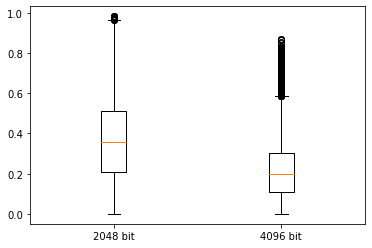

In [43]:
fils = [filled_short, filled_long]
labels = [f"{short_len} bit", f"{long_len} bit"]
xlab = "Type fingerprints"
ylab = "Fraction of filled fingerprints"

plt.boxplot(fils, labels=labels)
# plt.ylabel(ylab)
# plt.xlabel(xlab)
plt.show()

In [44]:
len([elem for elem in filled_short if elem > 0.9])

77